nocd50 submetido no dia 300621

In [1]:
using Gadfly

In [2]:
using DelimitedFiles

In [16]:
ENV["COLUMNS"] = 240 #para aumentar o número de colunas mostradas

240

In [21]:
#ρ, β, c0, λj
game_parameters = [0.93, 9.48, 0.09, 0.96];

#θs0, θj0, μ
simulation_parameters = [49.0, 30.0, 3.23];

In [3]:
SP1 = readdlm("SP1.csv", ',')

10×8 Array{Float64,2}:
 1.26005   1.0  1.72062  0.19697   1.58973   0.737316  0.483021  0.984867
 1.26556   1.0  1.75659  0.201515  1.51019   0.750865  0.471208  0.951156
 1.36734   1.0  1.84953  0.177652  0.975649  0.868305  0.331589  1.04666
 0.987854  1.0  1.88825  0.168939  1.07392   0.855229  0.506327  1.00995
 0.997473  1.0  1.96943  0.119318  0.907401  0.890231  0.554297  1.35725
 1.00133   1.0  2.00362  0.130303  0.825086  0.886855  0.52929   1.38488
 1.48424   1.0  2.05944  0.138636  0.822969  0.878916  0.55985   1.38647
 1.48908   1.0  2.17086  0.123864  0.8752    0.889575  0.557205  1.36444
 1.52095   1.0  2.33802  0.114394  0.893606  0.902012  0.647556  1.35519
 1.55388   1.0  2.58538  0.121212  0.76356   0.930015  0.850357  1.43231

In [17]:
SP301 = readdlm("SP301.csv", ',')

10×8 Array{Float64,2}:
 0.881645  0.998251  1.25283  0.447727  0.828697  0.193987  0.538697  0.672164
 0.95254   1.0       1.28861  0.37803   0.903641  0.177027  0.497318  0.749023
 0.992696  0.998739  1.28754  0.339242  0.596981  0.25606   0.564731  0.8057
 0.939503  0.99963   1.29285  0.389545  0.737614  0.218526  0.538406  0.751784
 1.04411   0.995808  1.4085   0.307727  0.607306  0.254435  0.568034  0.851755
 1.0977    0.9995    1.35529  0.290152  0.603247  0.25855   0.569142  0.901258
 1.08476   1.0       1.49073  0.306515  0.615688  0.252694  0.548419  0.873099
 1.09371   0.997291  1.60656  0.30697   0.609238  0.253386  0.555064  0.869944
 1.17044   0.998071  2.15899  0.334242  0.647179  0.245912  0.554736  0.824636
 1.52583   0.999828  2.75165  0.904242  0.732857  0.377703  0.706609  0.5328

Gráfico comparando a variação do primeiro momento em relação ao parâmetro de simulação 7, $\mu$

In [5]:
#bounds for g
lg = [0.4, 1.0, 0.01, 0.01]
ug = [0.93, 48.0, 0.6, 0.99]
#ρ was limited at 0.93 because a higher value would create more periods and calculations would take longer than we could afford.


#bounds for s
#μ can be 0.5 month or 18 months
ls = [1, 1, 0.5] 
us = [50, 50, 16]

3-element Array{Int64,1}:
 50
 50
 16

In [6]:
#data_moments
data_moments = [1.479, 0.843, 2.76, 0.969, 0.6235, 0.5569, 0.773, 0.497];

In [9]:
#para relacionar os momentos aos parâmetros que eles deveriam ajudar a identificar
moments = [3, 2, 4, 7, 5, 6, 1];

parameter = 1

moment = moments[parameter]

ub = ug[parameter]
lb = lg[parameter]



0.4

In [10]:
function plot_moment(parameter, moment, ub, lb, DataDou, DataZe, data_moments)
    
    
    X = LinRange(lb, ub, size(DataZe,1))
    
    p = plot()
    
    color_y1 = "#1f77b4"
    color_y2 = "#ff7f0e"
    
    
    
    
    
    #camada com os dados do Dou
    push!(p, layer(x=X, y = DataDou[:,moment],
            Geom.line, 
            Theme(default_color=color(color_y1),
                line_style=[:dash],
                line_width=0.4mm)))
    
    #camada com os dados do Ze
    push!(p, layer(x=X, y = DataZe[:,moment], 
            Geom.line, 
            Theme(default_color=color(color_y2),
                line_style=[:dot],
                line_width=0.4mm)))
    

    
    push!(p, Guide.manual_color_key("Estimação",
            ["Dou et al","Zé"], 
            [color_y1, color_y2]))

    
    label_moment = data_moments[moment]
    
    push!(p, Guide.xlabel("Parameter $parameter"))
    push!(p, Guide.ylabel("Moment $moment"))
    push!(p, Guide.title("Variation of Moment $moment as a function of Parameter $parameter, 
            Data moment = $label_moment"))

    ticksx = X
    push!(p, Guide.xticks(ticks=ticksx))
    
end
    


plot_moment (generic function with 1 method)

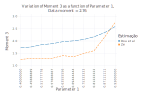

In [11]:
p = plot_moment(parameter, moment, ub, lb, SP1, SP301, data_moments)

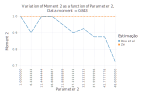

In [22]:
parameter = 2

moment = moments[parameter]

ub = ug[parameter]
lb = lg[parameter]


SP = readdlm(string("SP","$parameter",".csv"), ',')
SP30 = readdlm(string("SP30","$parameter",".csv"), ',')


p = plot_moment(parameter, moment, ub, lb, SP, SP30, data_moments)

In [23]:
SP30

10×8 Array{Float64,2}:
 3.11057   0.997042  3.15341  0.972121  0.817     0.129769  0.771444  0.53182
 2.28209   0.999687  2.85465  0.964394  0.993406  0.331275  0.745457  0.530242
 1.43395   1.0       2.77444  0.50697   0.502804  0.279192  0.667265  0.713804
 1.23599   1.0       2.78468  0.499242  0.536934  0.247939  0.646388  0.68894
 1.14641   1.0       2.8629   0.509848  0.550156  0.231859  0.63996   0.649662
 0.922014  1.0       2.65553  0.313636  1.75443   0.351461  0.675622  0.277388
 0.925828  1.0       2.7454   0.318333  1.76898   0.350357  0.655871  0.262118
 0.936263  1.0       2.83197  0.307727  1.74726   0.343974  0.627425  0.247376
 0.960318  0.999215  3.02477  0.381818  1.9064    0.35818   0.577298  0.21419
 0.960451  0.999697  3.07936  0.470606  2.12021   0.3808    0.525076  0.199555

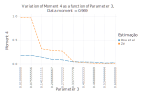

In [24]:
parameter = 3

moment = moments[parameter]

ub = ug[parameter]
lb = lg[parameter]


SP = readdlm(string("SP","$parameter",".csv"), ',')
SP30 = readdlm(string("SP30","$parameter",".csv"), ',')


p = plot_moment(parameter, moment, ub, lb, SP, SP30, data_moments)

In [25]:
SP30

10×8 Array{Float64,2}:
 1.8203    0.999543  2.85814  0.976061    1.0915     0.360493  0.509382  0.613153
 1.82103   1.0       2.7921   0.966818    1.16559    0.440607  0.660495  0.53328
 1.63048   1.0       2.82545  0.317879    0.301335   0.336791  0.651287  0.903143
 1.61976   1.0       2.81883  0.284697    0.279673   0.339245  0.585391  0.899684
 1.71189   0.998412  2.75139  0.269697    0.0980021  0.382491  0.580322  0.882803
 1.33994   0.978333  2.62965  0.0493939   0.308806   0.500778  0.684413  0.852139
 1.0934    0.79      2.03082  0.0257576   0.247406   0.539076  0.634055  0.684519
 0.900197  0.67      1.72618  0.0162121   0.224314   0.554453  0.488223  0.514791
 0.856645  0.615     1.61177  0.0139394   0.224115   0.556426  0.468683  0.425392
 0.627567  0.46      1.17076  0.00939394  0.223524   0.560006  0.374524  0.290983

Parâmetros 5 ao 7

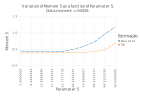

In [26]:
parameter = 5

moment = moments[parameter]

ub = us[parameter-4]
lb = ls[parameter-4]


SP = readdlm(string("SP","$parameter",".csv"), ',')
SP30 = readdlm(string("SP30","$parameter",".csv"), ',')

p = plot_moment(parameter, moment, ub, lb, SP, SP30, data_moments)

#obs: o valor é quase crescente, mas oscila entre 0.038, 0.037 e 0.052. 
#Provavelmente porque a chance de J ser sorteado é muito alta, então o valor esperado de S passa a ser baixo

In [27]:
SP30

10×8 Array{Float64,2}:
 1.12722  0.998669  2.8593   0.320758  0.380655  0.297743  0.692518  0.949813
 1.86087  1.0       2.86823  0.311667  0.3884    0.296352  0.685909  0.970778
 1.83336  1.0       2.88394  0.321667  0.384643  0.297121  0.686056  0.948567
 1.76617  0.9995    2.87838  0.323788  0.391632  0.295216  0.681282  0.943508
 1.79974  1.0       2.86186  0.356667  0.3964    0.293587  0.683548  0.884168
 1.68409  1.0       2.83093  0.397424  0.398554  0.292663  0.687405  0.829904
 1.69363  0.999643  2.83204  0.395152  0.405322  0.291697  0.683345  0.843395
 1.58969  0.99973   2.79922  0.546212  0.424155  0.293469  0.698533  0.684234
 1.58238  1.0       2.77274  0.711212  0.473044  0.29595   0.702397  0.595296
 1.54572  1.0       2.77453  0.909545  0.678796  0.3504    0.705494  0.534767

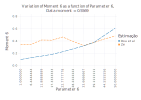

In [28]:
parameter = 6

moment = moments[parameter]

ub = us[parameter-4]
lb = ls[parameter-4]


SP = readdlm(string("SP","$parameter",".csv"), ',')
SP30 = readdlm(string("SP30","$parameter",".csv"), ',')

p = plot_moment(parameter, moment, ub, lb, SP, SP30, data_moments)

#obs: o valor é quase crescente, mas oscila entre 0.038, 0.037 e 0.052. 
#Provavelmente porque a chance de J ser sorteado é muito alta, então o valor esperado de S passa a ser baixo

In [29]:
SP30

10×8 Array{Float64,2}:
 2.12669  0.996379  3.21657  0.964394  1.56224   0.336947  0.579699  0.420684
 2.08506  0.998286  3.14278  0.966364  1.52222   0.345454  0.599897  0.435119
 2.01771  0.99905   3.08945  0.965     1.56848   0.415896  0.630812  0.446382
 1.98393  0.999382  3.02661  0.965909  1.41302   0.412604  0.651471  0.460672
 1.89995  0.99969   2.91477  0.968182  1.37919   0.464427  0.680383  0.486946
 1.84365  0.999848  2.8176   0.969697  1.07034   0.393288  0.702073  0.509353
 1.51828  1.0       2.68726  0.447576  0.456448  0.325661  0.693079  0.82075
 1.46907  1.0       2.53274  0.348636  0.454766  0.375933  0.699705  1.00658
 1.27375  1.0       2.20708  0.313485  0.442238  0.433446  0.722829  1.1759
 1.1182   1.0       1.78441  0.278788  0.444109  0.479765  0.736847  1.37369

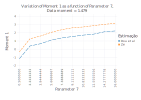

In [30]:
parameter = 7

moment = moments[parameter]

ub = us[parameter-4]
lb = ls[parameter-4]


SP = readdlm(string("SP","$parameter",".csv"), ',')
SP30 = readdlm(string("SP30","$parameter",".csv"), ',')

p = plot_moment(parameter, moment, ub, lb, SP, SP30, data_moments)

#obs: o valor é quase crescente, mas oscila entre 0.038, 0.037 e 0.052. 
#Provavelmente porque a chance de J ser sorteado é muito alta, então o valor esperado de S passa a ser baixo

In [31]:
#essa é a matriz calculando os momentos partindo das estimações nocd50 submetidas dia 300621
#sufixo 30 é devido ao dia 300621, sufixo 7 é porque estamos variando o parâmetro 7
SP307 = readdlm("SP307.csv", ',')


#há 10 linhas e 8 colunas
#cada linha é um dos pontos no qual fizemos variar o parâmetro
#cada coluna representa um momento
#exemplo: a coluna 1, linha 2 representa o valor do primeiro momento avaliado no segundo valor do parâmetro 


#momento 1 é o avg log da duração dos casos dentro da corte. E se não há casos dentro da corte, fica zero
#olhando a coluna 4, que 


SP307[:,:]

10×8 Array{Float64,2}:
 -0.330134  0.999818  0.901546  0.904545  0.675083  0.353369  0.708201  0.534912
  1.26676   1.0       2.48822   0.911818  0.701591  0.362313  0.709257  0.536146
  1.60693   0.999825  2.84225   0.907121  0.664766  0.347957  0.708846  0.536592
  2.05348   0.999831  3.28808   0.902424  0.693583  0.367403  0.707414  0.534066
  2.37508   1.0       3.60372   0.90803   0.682831  0.358746  0.708193  0.532902
  2.60669   1.0       3.83434   0.903485  0.662011  0.34604   0.706295  0.536861
  2.70197   0.999841  3.92139   0.91197   0.667781  0.34106   0.707236  0.538318
  2.87372   1.0       4.09874   0.907424  0.666028  0.355144  0.708315  0.537823
  3.02573   1.0       4.24964   0.907273  0.696556  0.367607  0.708844  0.53939
  3.15158   1.0       4.38093   0.904091  0.705916  0.360926  0.708806  0.538534